In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [80]:
path = 'Global_Landslide_Catalog_Export_20240424.csv'
df = pd.read_csv(path)
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [81]:
df.shape

(11033, 31)

In [82]:
na_percentage = df.isna().mean() * 100
print(na_percentage)

source_name                    0.000000
source_link                    7.667905
event_id                       0.000000
event_date                     0.000000
event_time                   100.000000
event_title                    0.000000
event_description              7.812925
location_description           0.924499
location_accuracy              0.018127
landslide_category             0.009064
landslide_trigger              0.208466
landslide_size                 0.081573
landslide_setting              0.625397
fatality_count                12.553249
injury_count                  51.427536
storm_name                    94.770235
photo_link                    86.440678
notes                         97.126801
event_import_source           14.166591
event_import_id               14.157527
country_name                  14.157527
country_code                  14.175655
admin_division_name           14.837306
admin_division_population     14.157527
gazeteer_closest_point        14.166591


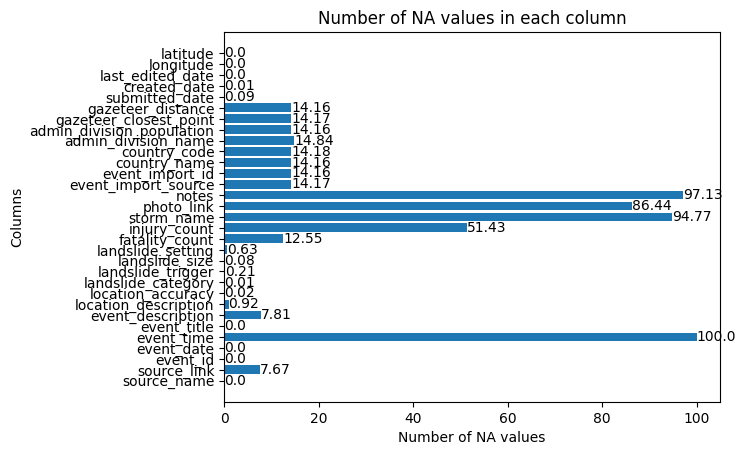

In [83]:
import matplotlib.pyplot as plt

# Define the data
columns = na_percentage.index
values = na_percentage.values

# Create the horizontal bar plot
plt.barh(columns, values)

# Add the exact number of NA values on top of the bars
for i, v in enumerate(values):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center')

# Set the labels and title
plt.xlabel('Number of NA values')
plt.ylabel('Columns')
plt.title('Number of NA values in each column')

# Show the plot
plt.show()

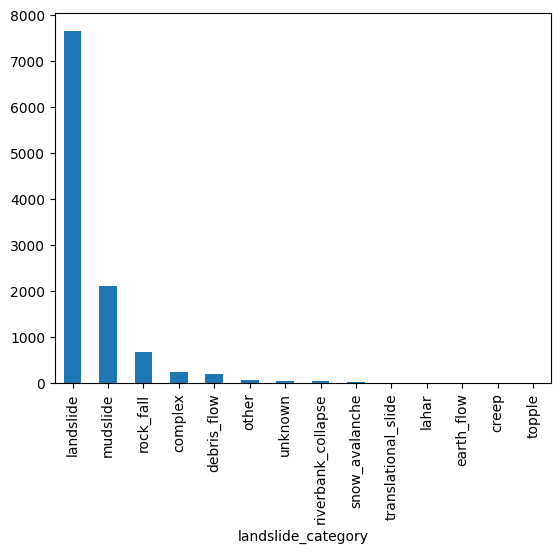

In [88]:
#faça as contagems de desliazmentos por categoria e mostre num gráfico de barras, mostre os Na no gráfico
df['landslide_category'].value_counts().plot(kind='bar')

# Show the plot
plt.show()




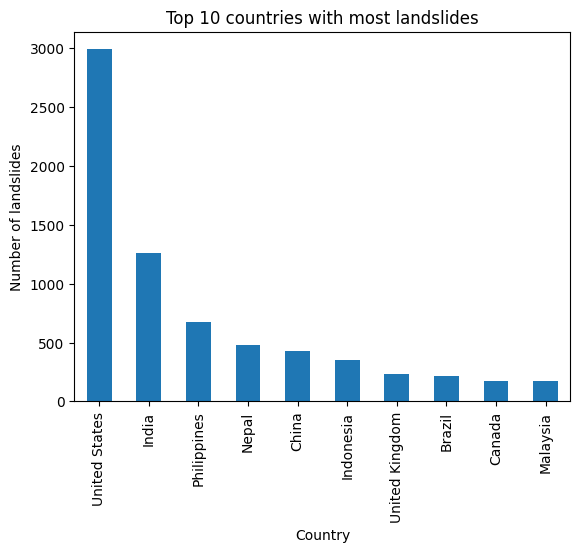

In [87]:
#faça um top 10 dos países com mais deslizamentos
df['country_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries with most landslides')
plt.xlabel('Country')
plt.ylabel('Number of landslides')
plt.show()

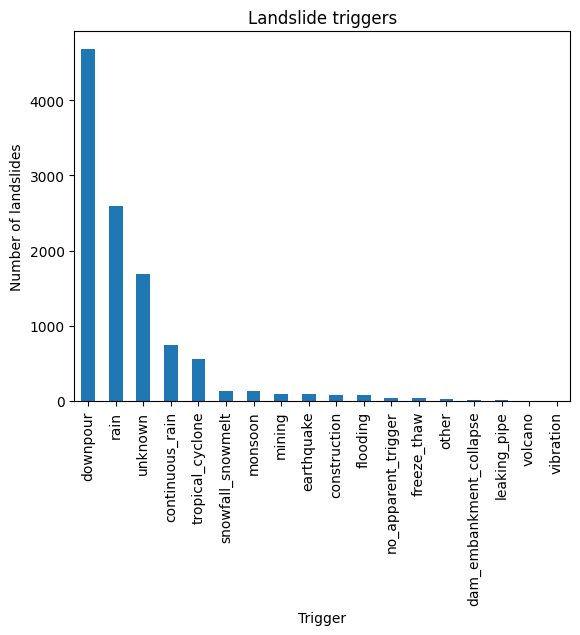

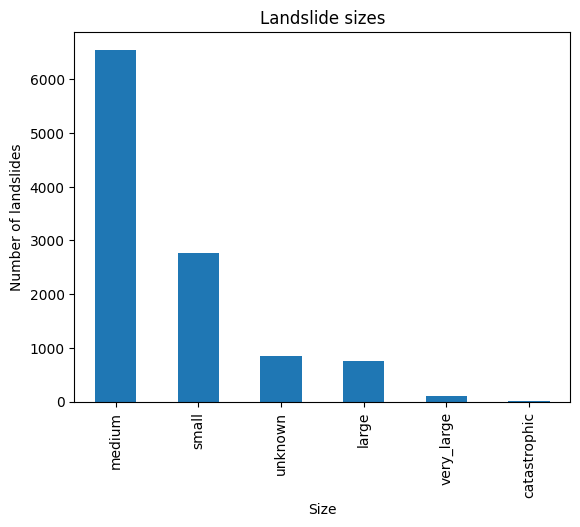

In [90]:
#gra´fico de landslide_trigger e landslide_size
df['landslide_trigger'].value_counts().plot(kind='bar')
plt.title('Landslide triggers')
plt.xlabel('Trigger')
plt.ylabel('Number of landslides')
plt.show()

df['landslide_size'].value_counts().plot(kind='bar')
plt.title('Landslide sizes')
plt.xlabel('Size')
plt.ylabel('Number of landslides')
plt.show()


C:\Users\chica\AppData\Local\Temp\ipykernel_4876\303495526.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['event_date'] = pd.to_datetime(df['event_date'])


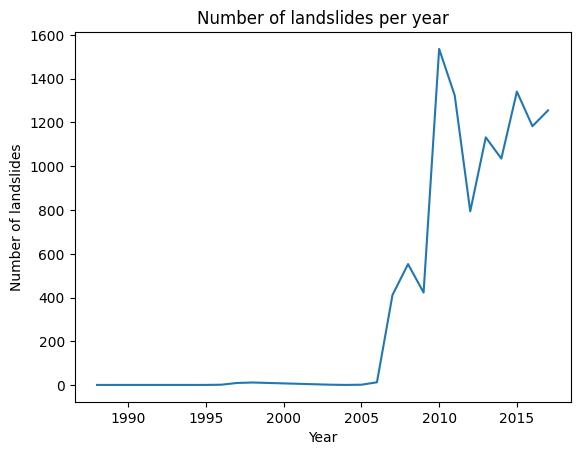

In [91]:
#Gráfico de linha com a quantidade de deslizamentos por ano
df['event_date'] = pd.to_datetime(df['event_date'])
df['event_year'] = df['event_date'].dt.year
df['event_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of landslides per year')
plt.xlabel('Year')
plt.ylabel('Number of landslides')
plt.show()


C:\Users\chica\AppData\Local\Temp\ipykernel_4876\2409821465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['event_month'] = df_2010['event_date'].dt.month


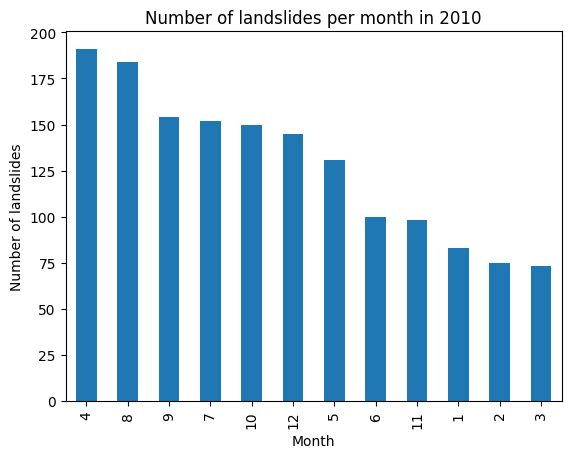

In [93]:
#em 2010, qual foi o mês com mais deslizamentos?
df_2010 = df[df['event_year'] == 2010]
df_2010['event_month'] = df_2010['event_date'].dt.month
df_2010['event_month'].value_counts().plot(kind='bar')
plt.title('Number of landslides per month in 2010')
plt.xlabel('Month')
plt.ylabel('Number of landslides')
plt.show()



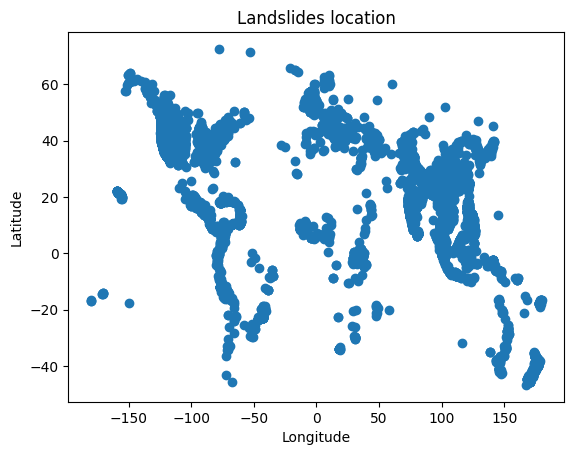

In [109]:
#como a latitude e longitudfe podem influenciar no acontecim,entop do desliazmento?
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Landslides location')
plt.show()
